In [20]:
import numpy as np
from scipy.optimize import golden, fmin_cg

In [21]:
from __animacija1D import animacija1D
from __metode import gradSpust, gradSpustMoment

**Optimizacija poševnega meta**

V metu poševni metalec meta kroglo v zrak pod kotom $\alpha$ glede na vodoravno smer. Za dano fiksno začetno hitrost, pod kakšnim kotom mora metalec metati, da bo krogla letela najdlje?

$
v_{nav} = v_0 \sin \alpha \\
v_{vod} = v_0 \cos \alpha
$

Čas leta bo odvisen od navpične komponente hitrosti, ki je dvakrat toliko kolikor potrebuje težni pospešek, da kroglo ustavi. Čas ustavljanja je enak:

$ t = \frac{v_{nav}}{g} $

Dolžina metanja je odvisna od vodoravne komponente hitrosti in časa leta:

$ s = v_{vod} 2t = 2\frac{v_0^2}{g} \sin \alpha \cos \alpha $

Dobiti moramo $\alpha$, ki maksimizira $s$. Čeprav je izraz odvedljiv in bi lahko izpeljali, ga lahko poiščemo tudi numerično.

In [22]:
def posevniMet(x):
    skalirniFaktor = -1.
    return skalirniFaktor * np.sin(x)*np.cos(x)

In [23]:
print(fmin_cg(posevniMet, 1.5))
print(golden(posevniMet, brack=[0.2, 1.2]))

Optimization terminated successfully.
         Current function value: -0.500000
         Iterations: 2
         Function evaluations: 10
         Gradient evaluations: 5
[0.78539935]
0.7853981619249679


0.7939788320911594 -0.49992637393177236 21


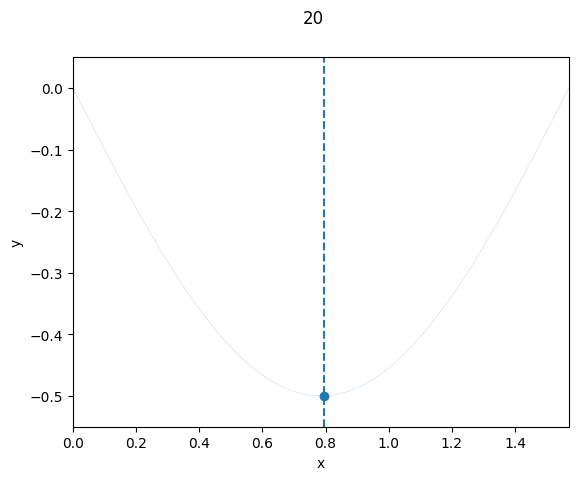

In [24]:
ani = animacija1D(posevniMet, (0.,0.5*np.pi), fN=100)

# POSKUSI zagnati kakšno metodo več pod drugačnimi pogoji! (glej zakomentirane primere)
# Potek metod za par korakov-----------------------------------------------------------
ani.racunaj(metoda=gradSpust, x0=1.5, par=[0.1, 0.0001], N=20)
# ani.racunaj(metoda=gradSpustMoment, x0=0.5, par=[0.1, 0.001, 1.0, 0.2, 0.1], N=20)

# Zaženemo animacijo
ani.narisi(casAnimacije=500, verbose=0, jupyter=True)

0.7832202882167608 -0.4999952568671965 70


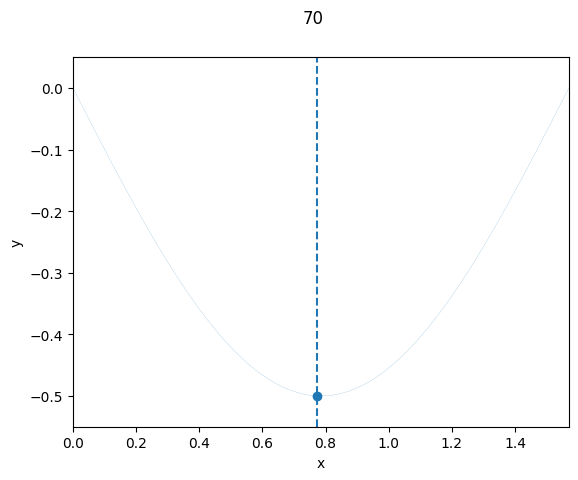

In [25]:
ani = animacija1D(posevniMet, (0.,0.5*np.pi), fN=100)

# Potek metod do konvergence-----------------------------------------------------------
# ani.racunaj(metoda=gradSpust, x0=0.1, par=[0.1, 0.0001], eps=1e-5, konv=True)
ani.racunaj(metoda=gradSpustMoment, x0=1.5, par=[0.1, 0.001, 1.0, 0.2, -0.1], eps=1e-5, konv=True)

ani.narisi(casAnimacije=500, verbose=0, jupyter=True)